## CBOW 모델 구현

In [2]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 370 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 371 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 372 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 373 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 374 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 375 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 376 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 377 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 378 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 379 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 380 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 381 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 382 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 383 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 384 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 385 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 386 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 387 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 388 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 389 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 390 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 391 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 392 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 393 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 394 |  반복 1

| 에폭 686 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 687 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 688 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 689 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 690 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 691 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 692 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 693 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 694 |  반복 1 / 2 | 시간 0[s] | 손실 1.14
| 에폭 695 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 696 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 697 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 698 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 699 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 700 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 701 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 702 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 703 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 704 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 705 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 706 |  반복 1 / 2 | 시간 0[s] | 손실 1.14
| 에폭 707 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 708 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 709 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 710 |  반복 1

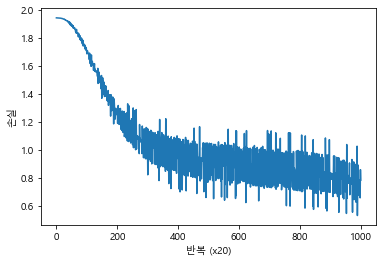

you [-1.0175842  0.9821205 -1.0076838 -0.9133877  1.5607244]
say [ 1.0989935 -1.132865   1.1412448  1.0969783  1.312561 ]
goodbye [-0.9242413   0.90833205 -0.8350068  -1.0084124   0.23617901]
and [ 0.9167016 -0.8977503  0.8106962  1.1688242  1.8113693]
i [-0.9439029   0.9069537  -0.83773553 -0.9979438   0.22052872]
hello [-1.007255    0.97723365 -1.0216589  -0.91198367  1.5845722 ]
. [ 0.95382077 -1.0464509   1.2069831   0.541118    0.02974731]


In [3]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])